In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

### 进行初步的可视化和数据处理,包括对X的编码和归一化
#### 不包括对标签y的处理.输出四个文件到preprocessed_data文件夹

In [2]:
#导入csv文件:KDDTEST和KDDTest.csv
KDDTest = pd.read_csv('KDDTest.csv')
KDDTrain = pd.read_csv('KDDTrain.csv')

In [3]:
trainLen = len(KDDTrain)#训练集长度,方便预处理后分割

In [4]:
#检视数据,观察数据的基本情况
KDDTrain.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [5]:
KDDTest.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [6]:
KDDTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      125973 non-null  int64  
 1    protocol_type                125973 non-null  object 
 2    service                      125973 non-null  object 
 3    flag                         125973 non-null  object 
 4    src_bytes                    125973 non-null  int64  
 5   dst_bytes                     125973 non-null  int64  
 6    land                         125973 non-null  int64  
 7    wrong_fragment               125973 non-null  int64  
 8    urgent                       125973 non-null  int64  
 9    hot                          125973 non-null  int64  
 10  num_failed_logins             125973 non-null  int64  
 11   logged_in                    125973 non-null  int64  
 12   num_compromised              125973 non-nul

In [7]:
KDDTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      22544 non-null  int64  
 1    protocol_type                22544 non-null  object 
 2    service                      22544 non-null  object 
 3    flag                         22544 non-null  object 
 4    src_bytes                    22544 non-null  int64  
 5   dst_bytes                     22544 non-null  int64  
 6    land                         22544 non-null  int64  
 7    wrong_fragment               22544 non-null  int64  
 8    urgent                       22544 non-null  int64  
 9    hot                          22544 non-null  int64  
 10  num_failed_logins             22544 non-null  int64  
 11   logged_in                    22544 non-null  int64  
 12   num_compromised              22544 non-null  int64  
 13   

In [8]:
#发现列名里有空格,去掉列名里所有的空格
KDDTrain.columns = KDDTrain.columns.str.strip()
KDDTest.columns = KDDTest.columns.str.strip()

<AxesSubplot:>

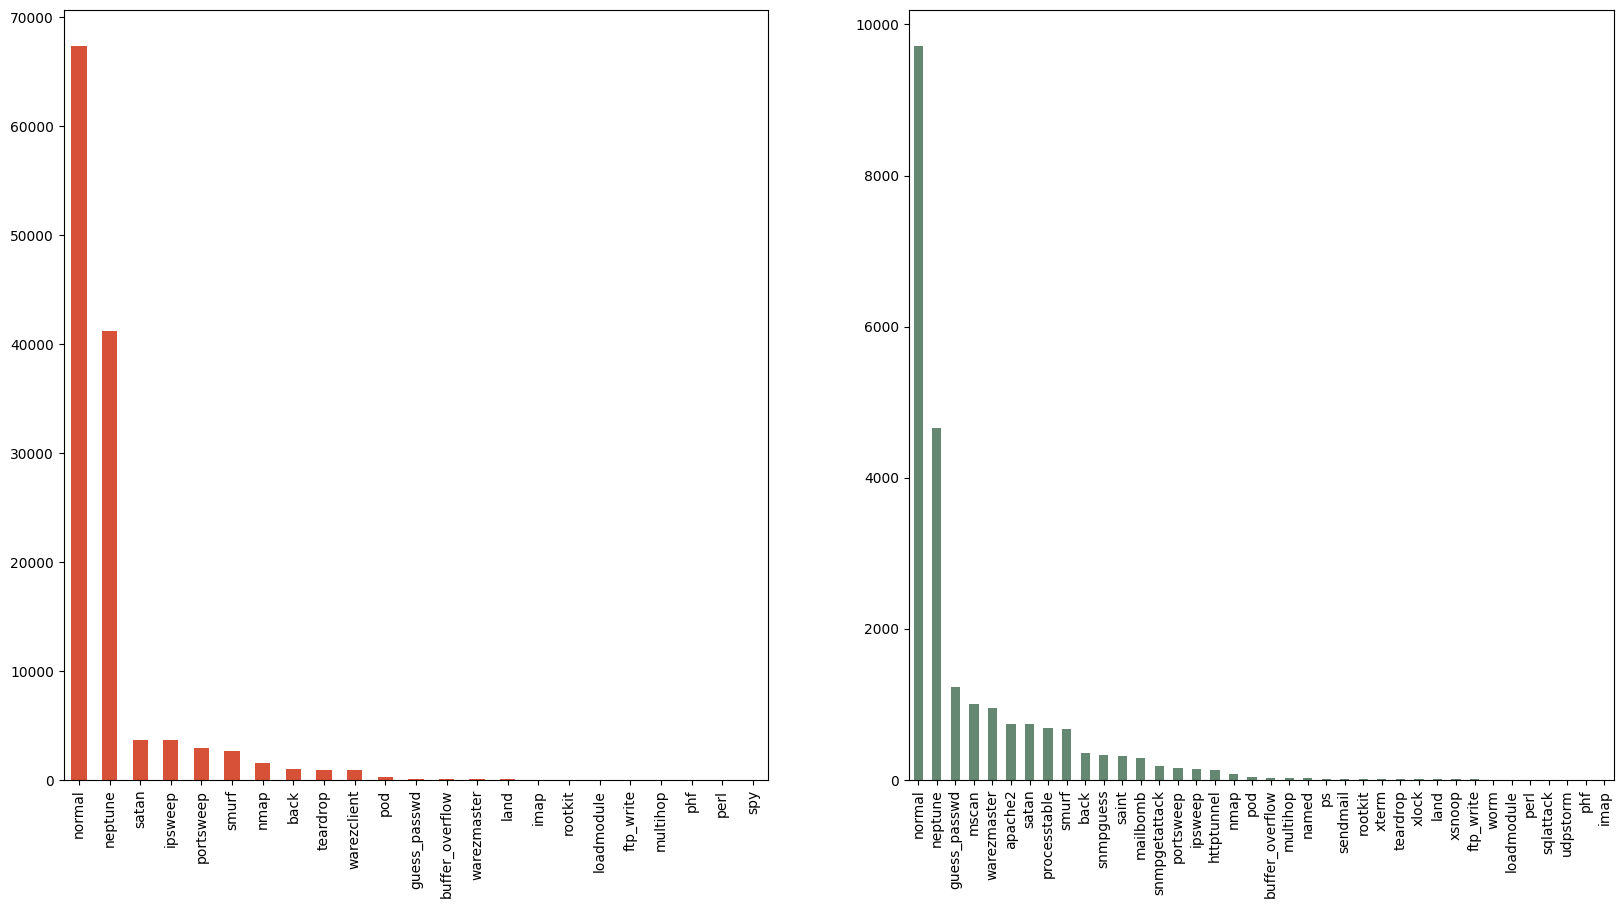

In [9]:
#将KDDTrain和KDDTest中subclass按照出现次数从大到小排序并绘制直方图,放在一个图里
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
KDDTrain['subclass'].value_counts().plot(kind='bar',color='#D75038')
plt.subplot(1,2,2)
KDDTest['subclass'].value_counts().plot(kind='bar',color = '#648872')

In [10]:
def frequency_rectangular_tree_graph(frequencyList,figsize=(8, 8),fontSize = 14,topN = 10,title = 'Subclass Distribution',colorSelector = 1):#画一个矩形树图
    labels = []
    sizes  = []
    colors1 = ['#2d2f23', '#678D73', '#BACD8E','#D1BEA7','#ABC9A8']#纳西妲配色
    colors2 = ['#19375C','#7AA4B8','#C1DBE4','#CB443B','#61AF8E']#妮露配色
    colors3 = ['#253156','#307D47','#B2CF53','#E3CE3C','#F0BF67','#E8A9AE','#8D275E','#5D1362','#89542D','#0D979D']#提纳里配色
    if colorSelector == 1:
        colors = colors1
    elif colorSelector == 2:
        colors = colors2
    elif colorSelector == 3:
        colors = colors3
    else:
        colors = colors1
    for x in range(0,len(frequencyList)):
        labels.append(frequencyList[x][0]) 
        sizes.append(frequencyList[x][1])
    if topN <= len(labels):
        elseSum = sum(sizes[topN:])
        labels = labels[:topN]
        sizes = sizes[:topN]
        labels.append('else')
        sizes.append(elseSum)
    # 对sizes做归一化,精度为小数点后一位
    #sizes = [round(x/sum(sizes),2) if round(x/sum(sizes),2)!=0 else 0.000001 for x in sizes]#不再进行归一化,直接使用词频
    # 计算每个矩形的位置和大小
    fig = plt.figure(figsize=figsize)
    squarify.plot(sizes=sizes,
                  label=labels,
                  alpha=.9,
                  text_kwargs={'fontsize':fontSize,'color':'white','fontweight':'bold'},
                  color=colors,
                  value=sizes, edgecolor="white", linewidth=2)
    plt.axis('off')
    plt.title(label=title,fontsize=fontSize+2,fontweight='bold')
    plt.show()

In [11]:
train_subclass_counts = KDDTrain['subclass'].value_counts().reset_index()
train_subclass_counts.columns = ['subclass','counts']
train_subclass_counts = train_subclass_counts.values.tolist()

test_subclass_counts = KDDTest['subclass'].value_counts().reset_index()
test_subclass_counts.columns = ['subclass','counts']
test_subclass_counts = test_subclass_counts.values.tolist()

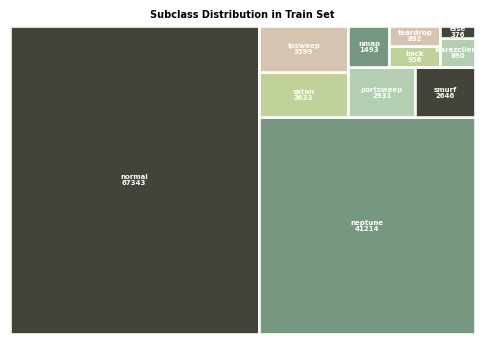

In [15]:
frequency_rectangular_tree_graph(train_subclass_counts,
                                 figsize=(6, 4),
                                 fontSize = 5,
                                 title = 'Subclass Distribution in Train Set',
                                 topN=10,
                                 colorSelector = 1)

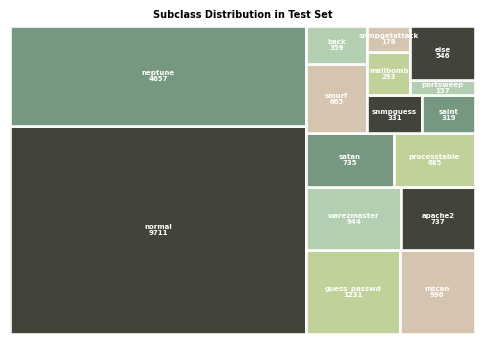

In [16]:
frequency_rectangular_tree_graph(test_subclass_counts,
                                 figsize=(6,4),
                                 fontSize = 5,
                                 title = 'Subclass Distribution in Test Set',
                                 topN = 15, 
                                 colorSelector = 1)

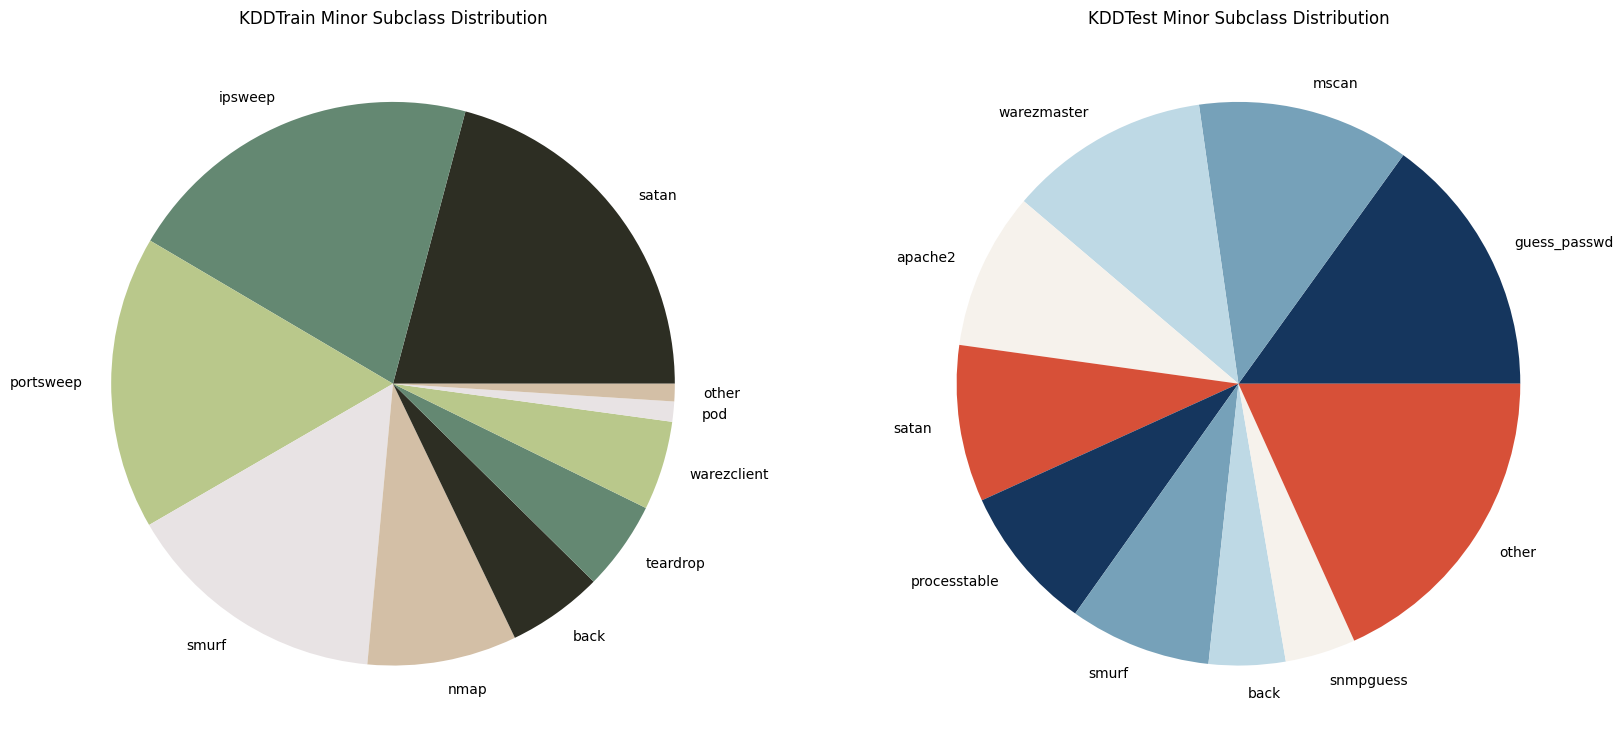

In [17]:
def piePlot2(train_counts,test_counts):
    # 去掉最高和第二高值
    train_counts = train_counts[2:]
    test_counts = test_counts[2:]
    # 从大到小排序
    train_counts = train_counts.sort_values(ascending=False)
    test_counts = test_counts.sort_values(ascending=False)
    #排序第10及以后合并为other并去掉原来的行
    otherCount = 9
    other1 = sum(train_counts[otherCount:])
    other2 = sum(test_counts[otherCount:])
    train_counts = train_counts[:otherCount]
    test_counts = test_counts[:otherCount]
    train_counts['other'] = other1
    test_counts['other'] = other2
    # 绘制饼图
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.pie(train_counts, labels=train_counts.index, colors=['#2D2E23','#648872','#B9C88B','#E8E3E4','#D3BFA6'])
    plt.title('KDDTrain Minor Subclass Distribution')
    plt.subplot(1,2,2)
    plt.pie(test_counts, labels=test_counts.index, colors=['#15365E','#76A1B9','#BED9E5','#F6F2EC','#D75038'])
    plt.title('KDDTest Minor Subclass Distribution')
    plt.show()
piePlot2(KDDTrain['subclass'].value_counts(),KDDTest['subclass'].value_counts())

In [11]:
#拼接数据集,将KDDTrain和KDDTest拼接起来
KDD = pd.concat([KDDTrain,KDDTest],axis=0)
del KDDTrain,KDDTest

In [12]:
y = KDD[['subclass']]#将subclass列提取出来作为y

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

In [14]:
#处理X
#提取除了subclass以外的所有列作为X
X = KDD.drop(['subclass'],axis=1)
#将所有可转换的数字字符串转换为float类型
#X = X.apply(lambda x:pd.to_numeric(x,errors='ignore'))

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13  

In [16]:
#提取X所有非数值型数据并进行编码
X_obj = X.select_dtypes(include=['object'])
XMlb = MultiLabelBinarizer()
XMlb.fit(X_obj.values)
X_obj = XMlb.transform(X_obj.values)
#将编码后的非数值型数据取代原来的数据
X = X.drop(X.select_dtypes(include=['object']).columns,axis=1)
X = np.hstack((X,X_obj))

In [17]:
#依据KDDTrain的行数列将y重新拆分训练集和测试集
y_train = y[:trainLen]
y_test = y[trainLen:]

In [18]:
#依据KDDTrain的行数列将X重新拆分训练集和测试集
X_train = X[:trainLen]
X_test = X[trainLen:]

In [19]:
#对X进行标准化
from sklearn.preprocessing import StandardScaler
ss1 = StandardScaler()
ss1.fit(X_train)
X_train = ss1.transform(X_train)
X_test = ss1.transform(X_test)

In [20]:
#分别导出X_train,X_test,y_train,y_test._csv
pd.DataFrame(X_train).to_csv('preprocessed_data/X_train.csv',index=False,header=False)
pd.DataFrame(X_test).to_csv('preprocessed_data/X_test.csv',index=False,header=False)
pd.DataFrame(y_train).to_csv('preprocessed_data/y_train.csv',index=False,header=False)
pd.DataFrame(y_test).to_csv('preprocessed_data/y_test.csv',index=False,header=False)